In [351]:
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

In [352]:
df = pd.read_csv("Admission_Prediction.csv")

In [353]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [354]:
df['University Rating'] = pd.to_numeric(df['University Rating'], errors='coerce')

In [355]:
df['TOEFL Score'] = pd.to_numeric(df['TOEFL Score'], errors='coerce')

In [356]:
df['GRE Score'] = pd.to_numeric(df['GRE Score'], errors='coerce')

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [358]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [357]:
df['GRE Score'].fillna(df['GRE Score'].mean(), inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(), inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(), inplace=True)


In [276]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [359]:
df.drop('Serial No.',axis =1,inplace = True)

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

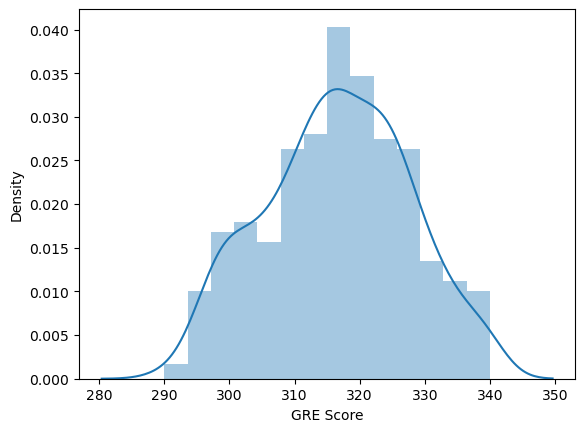

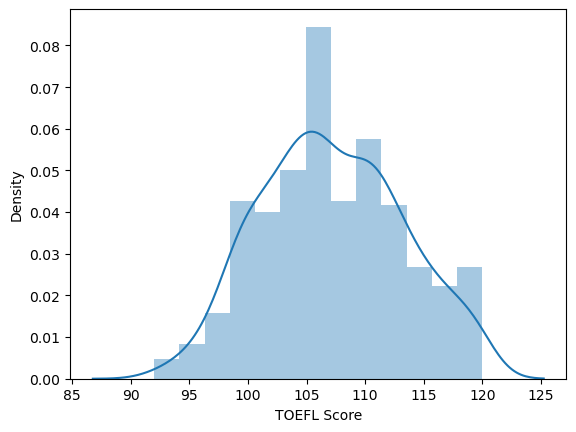

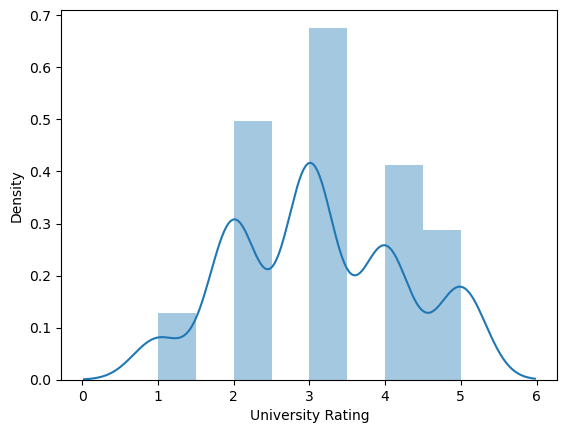

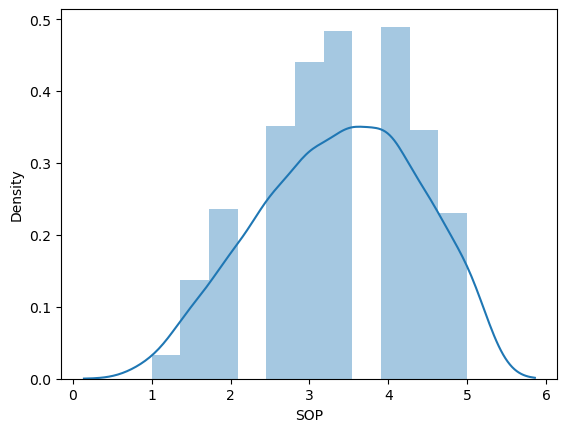

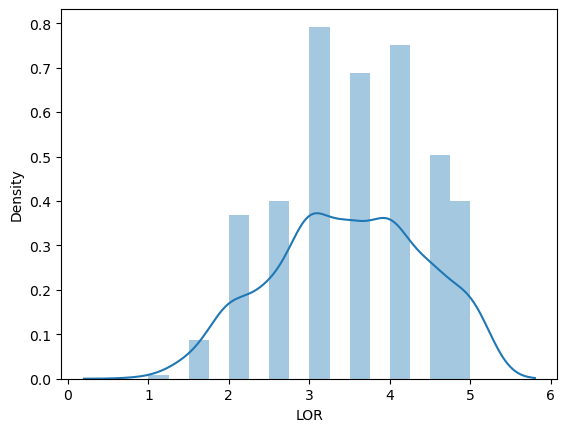

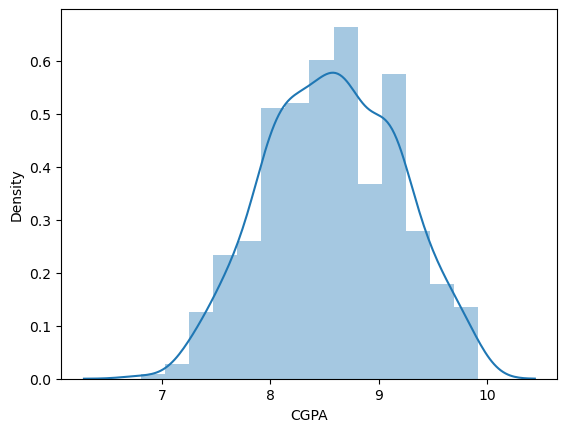

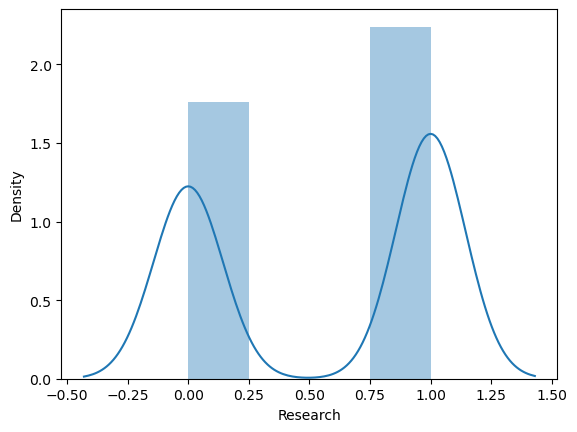

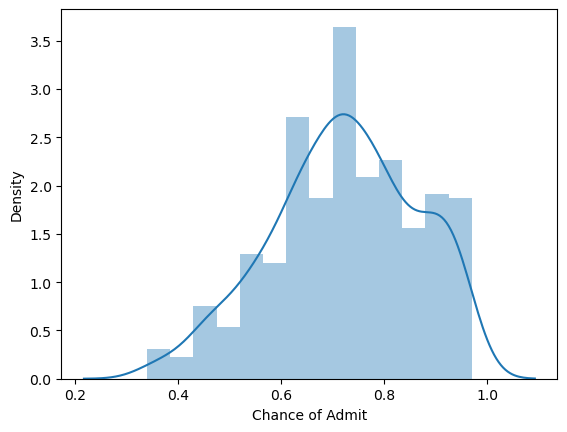

In [279]:
for column in df.columns:
    sns.distplot(df[column])
    plt.show()

In [360]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(columns=['Chance of Admit'], axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

             feature          VIF
0          GRE Score  1275.596985
1        TOEFL Score  1194.651453
2  University Rating    20.686567
3                SOP    34.449850
4                LOR    30.951315
5               CGPA   928.315950
6           Research     2.879356


In [281]:
df.corr().style.background_gradient(cmap = 'coolwarm')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.819663,0.623084,0.608372,0.527623,0.818347,0.544993,0.802304
TOEFL Score,0.819663,1.000000,0.643555,0.643155,0.535785,0.805557,0.464913,0.786675
University Rating,0.623084,0.643555,1.000000,0.712991,0.606291,0.696592,0.424429,0.680716
SOP,0.608372,0.643155,0.712991,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.527623,0.535785,0.606291,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818347,0.805557,0.696592,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544993,0.464913,0.424429,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.802304,0.786675,0.680716,0.684137,0.645365,0.882413,0.545871,1.000000


In [361]:
x= df.iloc[:,0:7]

In [362]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [363]:
y= df.iloc[:,-1]

In [364]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit_transform(df)
# scaled_data = model.transform(df)
 
# # print scaled data
# scaled_data

In [285]:
arr = model

In [286]:
arr[0]

array([1.84274116, 1.78854223, 0.77890565, 1.13735981, 1.09894429,
       1.77680627, 0.88640526, 1.40610734])

In [287]:
x.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1


In [365]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.18,random_state=45)

In [289]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
128,326.000000,112.0,3.0,3.5,3.0,9.10,1
448,312.000000,109.0,2.0,2.5,4.0,9.02,0
292,302.000000,99.0,2.0,1.0,2.0,7.97,0
279,316.558763,102.0,2.0,3.0,4.0,8.73,0
224,305.000000,105.0,2.0,3.0,2.0,8.23,0
...,...,...,...,...,...,...,...
32,338.000000,118.0,4.0,3.0,4.5,9.40,1
380,322.000000,104.0,3.0,3.5,4.0,8.84,1
131,303.000000,105.0,5.0,5.0,4.5,8.65,0
414,321.000000,110.0,4.0,3.5,4.0,8.35,1


In [290]:
y_train

128    0.84
448    0.80
292    0.56
279    0.67
224    0.67
       ... 
32     0.91
380    0.78
131    0.77
414    0.72
459    0.89
Name: Chance of Admit, Length: 410, dtype: float64

In [366]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [292]:
lr.score(X_test,y_test)

0.8418785060974416

In [293]:
lr.score(X_train,y_train)

0.81326229161573

In [294]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76


In [295]:
predict_1=scaler.fit_transform([[324,107,4,4,4.5,8.87,1]])

In [296]:
print(predict_1)

[[0. 0. 0. 0. 0. 0. 0.]]


In [297]:
lr.predict([[0, 0 ,0, 0, 0 ,0 ,0]])

array([-1.22046054])

In [298]:
lr.predict([[324,107,4,4,4.5,8.87,1]])

array([0.80170451])

In [299]:
print(X_test)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
204      298.0        105.0                3.0  3.5  4.0  8.54         0
481      323.0        107.0                4.0  3.0  2.5  8.48         1
296      310.0        107.0                3.0  3.5  3.5  8.67         0
38       304.0        105.0                1.0  3.0  1.5  7.50         0
298      330.0        114.0                3.0  4.5  4.5  9.24         1
..         ...          ...                ...  ...  ...   ...       ...
35       320.0        110.0                5.0  5.0  5.0  9.20         1
25       340.0        120.0                5.0  4.5  4.5  9.60         1
407      298.0        100.0                3.0  2.5  4.0  7.95         1
382      324.0        110.0                4.0  4.5  4.0  9.15         1
337      332.0        118.0                5.0  5.0  5.0  9.47         1

[90 rows x 7 columns]


In [300]:
lr.predict([[337  ,    332.0   ,     118.0   ,             5.0  ,5.0 , 5.0,  9.47]])

array([1.61723582])

In [301]:
predict_2=scaler.fit_transform([[337  ,    332.0   ,     118.0   ,             5.0  ,5.0 , 5.0,  9.47]])

In [302]:
print(predict_2)

[[0. 0. 0. 0. 0. 0. 0.]]


In [303]:
lr.predict([[0., 0. ,0. ,0., 0., 0., 0.]])

array([-1.22046054])

# Manually

In [304]:
X.mean()

GRE Score            316.558763
TOEFL Score          107.187755
University Rating      3.121649
SOP                    3.374000
LOR                    3.484000
CGPA                   8.576440
Research               0.560000
dtype: float64

In [305]:
X.std()

GRE Score            11.103952
TOEFL Score           6.051338
University Rating     1.128802
SOP                   0.991004
LOR                   0.925450
CGPA                  0.604813
Research              0.496884
dtype: float64

In [306]:
for column in x.columns:
    print(column)

GRE Score
TOEFL Score
University Rating
SOP
LOR
CGPA
Research


In [307]:

def scaler_x(k):
    v = []
    for column in x.columns:
        v.append((k - X[column].mean())/X[column].std())
        return v
    


In [308]:
l = [324.00, 107, 4.0,4.0,4.5,8.87,1]

In [309]:
[scaler_x(k) for k in l]

[[0.6701431377254015],
 [-18.87244886280382],
 [-28.148425710981286],
 [-28.148425710981286],
 [-28.10339669715518],
 [-27.70984311631503],
 [-28.41859979393791]]

# Ridge Regression

In [310]:
from sklearn.linear_model import Ridge

In [311]:
reg = Ridge(alpha=0.01, fit_intercept =False)

In [312]:
reg.fit(X_train,y_train)

Ridge(alpha=0.01, fit_intercept=False)

In [313]:
reg.score(X_test,y_test)

0.7748471573229976

In [314]:
y_pred = reg.predict(X_test)


In [315]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76


In [316]:
reg.predict([[324.0,107.0,4.0,4.0,4.5,8.87,1]])

array([0.79728641])

In [317]:
reg.predict(scaler.fit_transform([[324.0,107.0,4.0,4.0,4.5,8.87,1]]))

array([0.])

# Ridge CV

In [318]:
from sklearn.linear_model import RidgeCV,LassoCV
import numpy as np
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=10,normalize=True)

In [319]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([7.79686592, 1.89462975, 4.3104896 , 3.29524001, 6.26467758,
       6.07848331, 2.65578276, 9.00598043, 7.31065278, 6.44282242,
       4.60138794, 8.09488934, 6.84619837, 9.13625487, 3.80924321,
       1.20864773, 5.79559244, 4.28061953, 5.10949332, 5.45003132,
       5.09115706, 3.74033337, 0.67630225, 4.7374932 , 4.75289564,
       4.6090175 , 6.60461259, 3.3167646 , 4.50823969, 6.05521103,
       7.117472  , 6.39948398, 0.71662995, 9.8192041 , 3.49281936,
       7.63473065, 4.015903  , 6.11876434, 6.33118399, 0.81466259,
       0.46377953, 9.12006763, 8.0590689 , 7.95462615, 5.71421156,
       0.64317555, 1.66740129, 2.15169358, 3.29618213, 8.49482519]),
        cv=10, normalize=True)

In [320]:
ridgecv.alpha_

0.463779526385778

In [321]:
ridgecv.score(X_test,y_test)

0.8175205154957834

# LassoCV

In [322]:
lassocv=LassoCV(alphas=[10,1000,1,0.1,0.0000001,100],cv=20,max_iter=20000,verbose=True)

In [323]:
lassocv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
........................................................................................................................[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


LassoCV(alphas=[10, 1000, 1, 0.1, 1e-07, 100], cv=20, max_iter=20000,
        verbose=True)

In [324]:
lassocv.alpha_

1e-07

In [325]:
lassocv.score(X_test,y_test)

0.8418784494645266

In [326]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
el=ElasticNet()
el.fit(X_train,y_train)

ElasticNet()

In [327]:
ecv=ElasticNetCV(cv=14)
ecv.fit(X_train,y_train)

ElasticNetCV(cv=14)

In [328]:
el.score(X_test,y_test)

0.5566401535678152

In [329]:
ecv.score(X_test,y_test)

0.840400308425652

In [330]:
from sklearn.model_selection import GridSearchCV
lr=LinearRegression()

In [331]:
params={'alpha':[0.001,0.01,0.1,1,10]}
ridge=Ridge()
folds=10

In [332]:
gcv=GridSearchCV(estimator=ridge,
                param_grid=params,
                cv=folds)

In [333]:
gcv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]})

In [334]:
gcv.score(X_test,y_test)

0.8419498287262442

# Save the model

In [367]:
import pickle

In [368]:
filename='lr_for_admission.pickel'
pickle.dump(lr,open(filename,'wb'))

In [369]:
loaded_model = pickle.load(open('lr_for_admission.pickel','rb')) #read_book

In [370]:
sample=[[300,200,3.00,5,5,10.00,0]]

In [344]:
scaler.fit(x)

StandardScaler()

In [345]:
scaler.transform(sample)

array([[-1.49274302, 15.3528357 , -0.1078766 ,  1.64240413,  1.63976333,
         2.35607728, -1.12815215]])

In [371]:
loaded_model.predict(sample)

array([1.14742694])

In [372]:
loaded_model.predict([[-1.49274302, 15.3528357 , -0.1078766 ,  1.64240413,  1.63976333,
         2.35607728, -1.12815215]])

array([-0.88081824])